## 1. Set Kaggle API information and dataset local directories

In [2]:
# Set Kaggle API - Username / Key
import os
os.environ['KAGGLE_USERNAME'] = "franconicolsmerenda"
os.environ['KAGGLE_KEY'] = "edcd91fb1521ad3ee181a8b093795eab"
os.environ['DATASET_FOLDER'] = "/home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets"
os.environ['ART_STYLE'] = "all_styles"

# DATASET Folders
os.environ['TRAIN_DATASET_ART_STYLE'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/train"
os.environ['TEST_DATASET_ART_STYLE'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/test"

# Data to be consumed by the model!
os.environ['TOP_DIR']=f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset"
os.environ['TRAIN_ART_STYLE_DATA'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/train"
os.environ['VALID_ART_STYLE_DATA'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/test"

## 2. Download dataset if it is not stored locally

In [3]:
# Download Datasets if Needed
import os

# Define the folder path
folder_path = f"{os.environ['DATASET_FOLDER']}"

# Check if the folder exists
if not os.path.exists(f"{folder_path}/Real_AI_SD_LD_Dataset"):
    # Install kaggle package
    !pip install -q kaggle
    # Download the dataset from Kaggle
    !kaggle datasets download -d ravidussilva/real-ai-art -p $folder_path --unzip
else:
    print("Folder already exists.")

Folder already exists.


## 3. Import the needed dependencies for the model and data visualization

In [4]:
#Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

2024-07-20 13:36:28.808405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-20 13:36:29.280272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 4. Set dataset parameters and details

In [16]:
# Define paths to training and validation data
train_data_dir = os.environ['TRAIN_ART_STYLE_DATA']
valid_data_dir = os.environ['VALID_ART_STYLE_DATA']

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64
NUM_EPOCHS = 30

## 5. Define the directory path for training dataset

In [6]:
#Main directory where datasets are stored
top_dir = os.environ['TOP_DIR']

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/baroque
1. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/romanticism
2. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/renaissance
3. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/expressionism
4. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/post_impressionism
5. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/ukiyo_e
6. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/art_nouveau
7. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/realism
8. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/impressionism
9. /hom

## 6. Define the directory path for validation dataset

In [7]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/baroque
1. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/romanticism
2. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/renaissance
3. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/expressionism
4. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/post_impressionism
5. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/ukiyo_e
6. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/art_nouveau
7. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/realism
8. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/impressionism
9. /home/milleniu

## 7. Data preprocessing- Labeling training data.

In [8]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data with the columns filepath and label
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        #creating value to store in filepath column
        filepath = os.path.join(directory, file)
        #append value into the column filepath
        filepaths.append(filepath)
        #adding classification 'human' to value
        labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        #creating value to store in filepath column
        filepath = os.path.join(directory, file)
        #append value into the column filepath
        filepaths.append(filepath)
        #adding classification 'AI' to value
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

## 8. Display the amount of images for training dataset

In [10]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       105015
human     50000
Name: count, dtype: int64


## 9. Data preprocessing- Labeling validation data.

In [12]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

## 10. Display the amount of images for validation dataset

In [13]:
# Display the first few rows of the test_data DataFrame
print(test_data.head())

# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("\nNumber of files under each label:")
print(file_counts)

                                            filepath  label
0  /home/millenium-falcon/SoftwareProjects/ai-art...  human
1  /home/millenium-falcon/SoftwareProjects/ai-art...  human
2  /home/millenium-falcon/SoftwareProjects/ai-art...  human
3  /home/millenium-falcon/SoftwareProjects/ai-art...  human
4  /home/millenium-falcon/SoftwareProjects/ai-art...  human

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


## 11. Data preprocessing- Adding data augmentation and creating training dataset. 

In [17]:
#Created training set with data augmentation
training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                        rotation_range=7, # it will apply rotations to the image
                                        horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=64,
    class_mode='binary',  
    shuffle=True
)

Found 155015 validated image filenames belonging to 2 classes.


## 12. Data preprocessing- Adding data augmentation and creating validation dataset. 

In [20]:
#Created validation set
val_generator = ImageDataGenerator(rescale=1./255,rotation_range=7, # it will apply rotations to the image
                                        horizontal_flip=True)
val_dataset = val_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'binary',
                                                    shuffle = False)   # to associate the prediction with expected output

val_dataset.class_indices

Found 30000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

## 13. Defining InceptionV3 model and show its summary.

In [25]:
#Created network using InceptionV3 and transfer learning from 'ImageNet'
network= InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in network.layers:
    layer.trainable=False

network.summary()

# Added layers to the base model created by ResNet34
model = Sequential([
    network,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

## 14. Compile the model

In [26]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Add EarlyStopping with a patience of 5 to avoid overfitting.
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

## 15. Train the model :)

In [28]:
#TRAINING MODEL
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=val_dataset, callbacks=[es])

Epoch 1/30


/home/millenium-falcon/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1721493541.164497  714097 service.cc:145] XLA service 0x78f3d8054cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721493541.164520  714097 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-07-20 13:39:01.266767: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-20 13:39:02.156928: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
2024

   1/2423 ━━━━━━━━━━━━━━━━━━━━ 9:29:38 14s/step - accuracy: 0.6094 - loss: 0.7307

I0000 00:00:1721493548.663359  714097 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1093s 445ms/step - accuracy: 0.8204 - loss: 0.7242 - val_accuracy: 0.9032 - val_loss: 0.2312
Epoch 2/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1079s 444ms/step - accuracy: 0.8707 - loss: 0.2779 - val_accuracy: 0.9180 - val_loss: 0.1968
Epoch 3/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1080s 445ms/step - accuracy: 0.8858 - loss: 0.2574 - val_accuracy: 0.9338 - val_loss: 0.1701
Epoch 4/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1085s 447ms/step - accuracy: 0.8929 - loss: 0.2450 - val_accuracy: 0.9355 - val_loss: 0.1644
Epoch 5/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1080s 445ms/step - accuracy: 0.8978 - loss: 0.2315 - val_accuracy: 0.9366 - val_loss: 0.1595
Epoch 6/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1078s 444ms/step - accuracy: 0.9006 - loss: 0.2238 - val_accuracy: 0.9408 - val_loss: 0.1570
Epoch 7/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1076s 443ms/step - accuracy: 0.9022 - loss: 0.2210 - val_accuracy: 0.9382 - val_loss: 0.1545
Epoch 8/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1074s 442ms/step - accur

## 16. Plotting the accuracy and loss functions of the epochs

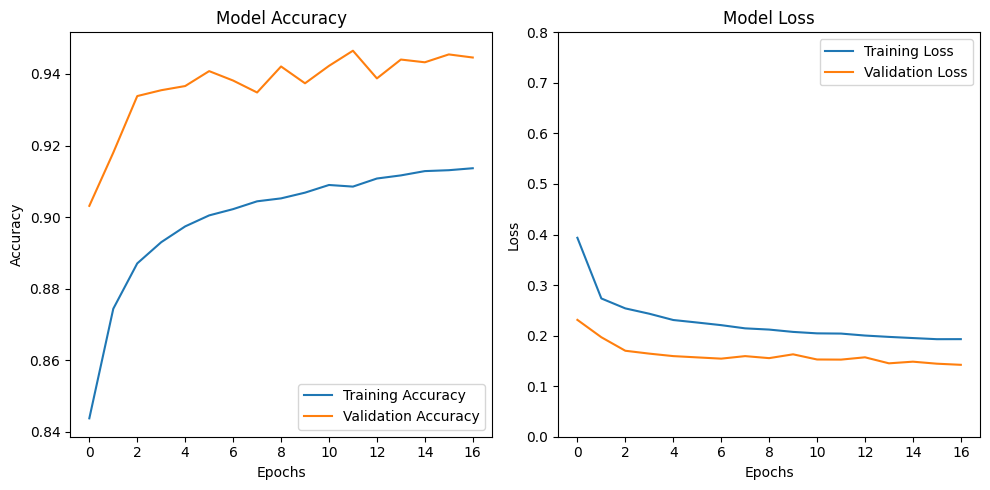

In [29]:
# Accuracy vs Loss

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.8)  # Adjust the upper limit of the y-axis
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 17. Evaluate the trained model

In [30]:
test_loss, test_acc = model.evaluate(val_dataset)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 166s 6ms/step - accuracy: 0.9190 - loss: 0.2390
Test accuracy: 0.9453999996185303
Test loss: 0.15188312530517578


## 18. Make predictions with the trained model

In [31]:
# Get the true labels
true_labels = val_dataset.classes

# Make predictions
predictions = model.predict(val_dataset)
predicted_labels = np.round(predictions).flatten()  # For binary classification


30000/30000 ━━━━━━━━━━━━━━━━━━━━ 183s 6ms/step


## 19. Generate F1 Score

In [ ]:
# Make predictions on the test data
y_pred_prob = predictions
y_pred = np.where(y_pred_prob > 0.5, 1, 0)
# Calculate F1 score
print(classification_report(true_labels, y_pred, target_names=val_dataset.class_indices.keys()))
f1 = f1_score(true_labels, y_pred)
print(f'F1 Score: {f1}')

## 20. Generate the confusion matrix to validate results and plot the information

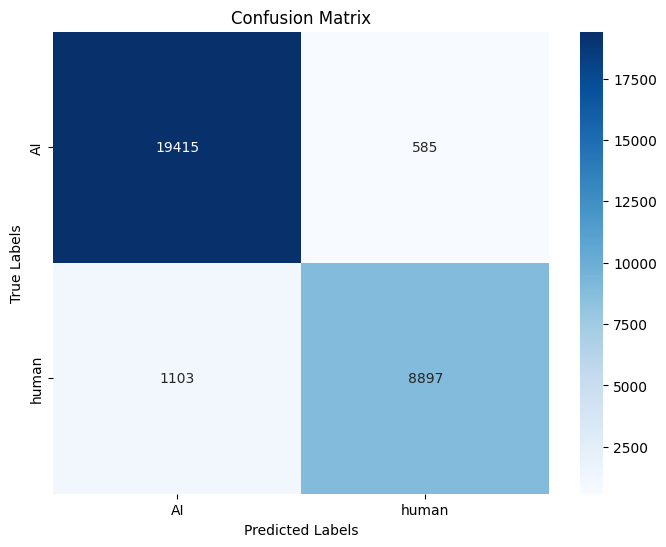

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['AI', 'human'], yticklabels=['AI', 'human'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
